In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from ripple_heterogeneity.utils import (
    functions,
    loading,
    batch_analysis,
    add_new_deep_sup,
    compress_repeated_epochs
)
from ripple_heterogeneity.readout import downstream_information
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nelpy as nel
import nelpy.plotting as npl
from matplotlib.ticker import AutoMinorLocator
from sklearn.cluster import KMeans
import os
from scipy import stats
from statannotations.Annotator import Annotator

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [14]:
basepath = r"Z:\Data\HMC1\day13"

# load in spike data
st, cm = loading.load_spikes(
    basepath, putativeCellType="Pyr"
)
cm = add_new_deep_sup.deep_sup_from_deepSuperficialDistance(cm)

# ripple expansion start, in seconds, how much to expand ripples
rip_exp_start=0.05  
rip_exp_stop=0.2
ripples_df = loading.load_ripples_events(basepath)
ripples = (
    nel.EpochArray(np.array([ripples_df.start, ripples_df.stop]).T)
    .expand(rip_exp_start, direction="start")
    .expand(rip_exp_stop, direction="stop")
)



In [15]:
ripple_mat = functions.get_participation(
    st.data, ripples.starts, ripples.stops, par_type="firing_rate"
)

In [16]:
ripple_mat.shape

(353, 7471)

In [9]:
ripple_mat[cm.brainRegion.str.contains("CA1"),:]

array([[ 3.28515112,  6.53594771, 13.53179973, ...,  0.        ,
         0.        ,  0.        ],
       [ 3.28515112,  0.        ,  0.        , ...,  0.        ,
         5.86166471,  3.28515112],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 3.28515112,  6.53594771,  3.38294993, ...,  0.        ,
         5.86166471, 13.14060447],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [13]:
cm.brainRegion.str.contains("PFC").any()

False

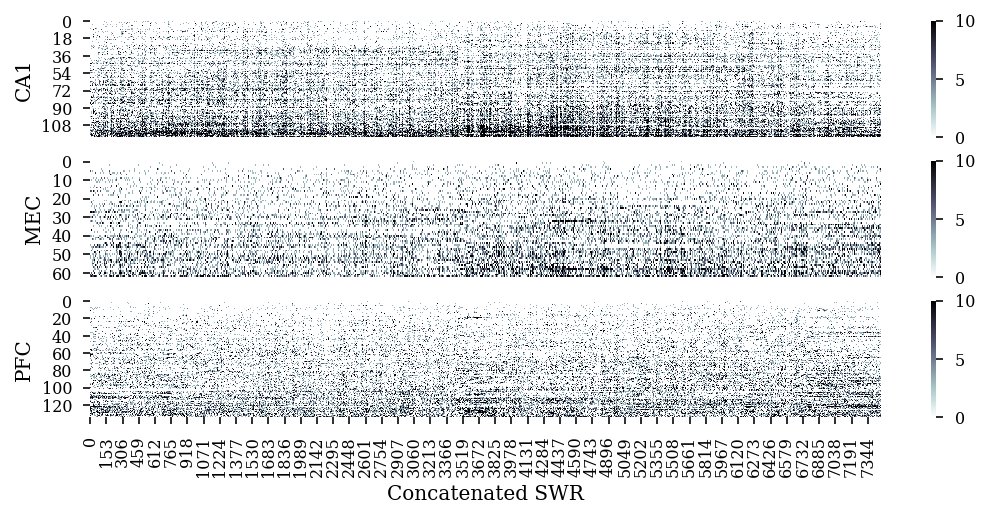

In [50]:
from ripple_heterogeneity.utils import scalebars

fig, axs = plt.subplots(3, 1,
    figsize=functions.set_size("thesis", fraction=1.5, subplots=(2, 3)),
    sharex=True,
)
fig.subplots_adjust(hspace=0.2, wspace=0.1)
axs = axs.ravel()

X = ripple_mat[cm.brainRegion.str.contains("CA1"),:]
X = X[np.argsort(X.mean(axis=1)),:]
sns.heatmap(X,ax=axs[0],vmax=10,vmin=0,cmap="bone_r")
X = ripple_mat[cm.brainRegion.str.contains("MEC"),:]
X = X[np.argsort(X.mean(axis=1)),:]
sns.heatmap(X,ax=axs[1],vmax=10,vmin=0,cmap="bone_r")
X = ripple_mat[cm.brainRegion.str.contains("PFC"),:]
X = X[np.argsort(X.mean(axis=1)),:]
sns.heatmap(X,ax=axs[2],vmax=10,vmin=0,cmap="bone_r")

# sb = scalebars.add_scalebar(axs[2],matchx=True, matchy=False, hidex=True, hidey=False,pad=-1.5)
# sns.despine()

axs[0].xaxis.set_visible(False)
axs[1].xaxis.set_visible(False)

axs[0].set_ylabel("CA1")
axs[1].set_ylabel("MEC")
axs[2].set_ylabel("PFC")

axs[2].set_xlabel("Concatenated SWR")

plt.show()